In [1]:
#%%
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random
#%%
#Plot linear decision boundary
def line(W, x):
        k = -(W.T[0]/W.T[1])
        m = -W.T[2]/W.T[1]
        return k*x+m
def draw_line(W):
    plt.ylim(-2, 2)
    plt.scatter(A[0],A[1])
    plt.scatter(B[0],B[1])
    x = [-3, 3]
    y = [line(W, x[0]), line(W, x[1])]
    plt.plot(x, y)
    plt.pause(0.01)
    plt.show()
#%%
def draw_2_line ( title, xlabel, ylabel, l0, l1, color1, label1, l2, color2, label2 ):
    fig_multiple = plt.figure()
    ax_multiple = plt.subplot(111)
    ax_multiple.plot(l0, l1, c=color1, label= label1 )
    ax_multiple.plot(l0, l2, c=color2, label= label2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    ax_multiple.legend()
    #plt.savefig('D:/Sweden/p3/ANN/lab1/part2/'+ title + '.png', dpi=300)
    plt.show()
#%%
def draw_learning_curve(error_list):
    x = np.arange(1, np.size(error_list)+1, 1)
    y = error_list
    plt.plot(x, y, 'r--')
    plt.title ("learning curve")
    plt.show()
#%%
#Mean squared error
def mean_squared_error(cal, actual, data_input):
    constant = 0.5/(len(data_input[0]))
    mean_sq_error = constant * (cal - actual)**2
    return  mean_sq_error
#%%
#Linear Data setup
np.random.seed(100)
n = 100
mA = [ 1.0, 0.5]; sigmaA = 0.5
mB = [-1.0, 0.0]; sigmaB = 0.5
mu = 0
sigma = 1 # standard deviation
#np.random.normal(mu, sigma, n)
A = np.array([np.random.normal(mu, sigma, n) * sigmaA + mA[0],
              np.random.normal(mu, sigma, n) * sigmaA + mA[1],
              np.ones(n)])
B = np.array([np.random.normal(mu, sigma, n) * sigmaB + mB[0],
              np.random.normal(mu, sigma, n) * sigmaB + mB[1],
              np.zeros(n)])
Data = np.concatenate((A, B), 1)
np.random.shuffle(Data.T)
pattern = Data[0:2,:]
bias = np.ones(len(Data[0]))
pattern_bias = np.vstack([pattern,bias]) #vstack adds a new row
target = Data[2,:]
#%%


## Perceptron batch mode

(3, 200)


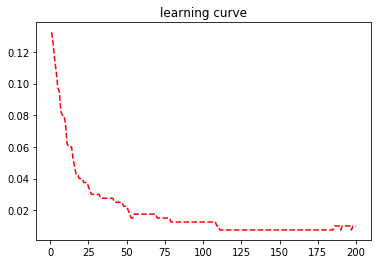

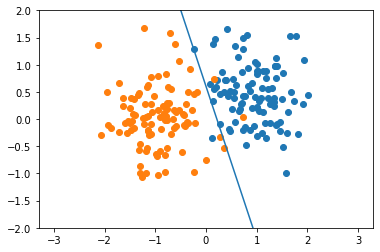

In [2]:


print (pattern_bias.shape)
learning_rate_perceptron = 0.001
errors_perceptron = []
W_new = np.array([1, 1, 1])
epoch_perceptron = 200
for i in range(epoch_perceptron):
    calculated_target = W_new.dot(pattern_bias)
    for j in range(len(Data[0])):
        if calculated_target[j] >= 0:
            calculated_target[j] = 1
        else:
            calculated_target[j] = 0
    error = target - calculated_target
    delta_W = learning_rate_perceptron * (error.dot(pattern_bias.T))
    W_new = W_new + delta_W
    mse_percep = mean_squared_error(calculated_target, target, Data)
    errors_perceptron.append(np.sum(mse_percep))
draw_learning_curve(errors_perceptron)
draw_line(W_new)


## delta rule batch

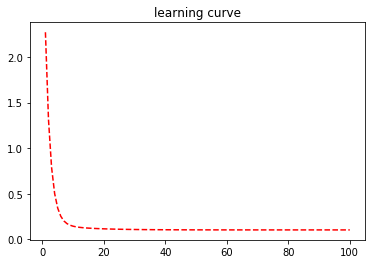

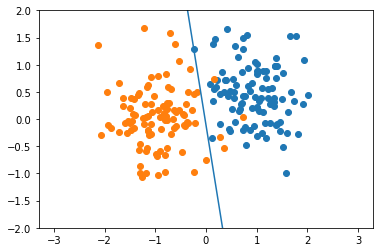

In [3]:
#%%

A_delta= np.array([np.random.normal(mu, sigma, n) * sigmaA + mA[0],
              np.random.normal(mu, sigma, n) * sigmaA + mA[1],
              np.ones(n)])
B_delta = np.array([np.random.normal(mu, sigma, n) * sigmaB + mB[0],
              np.random.normal(mu, sigma, n) * sigmaB + mB[1],
              np.negative(np.ones(n))])
Data_delta = np.concatenate((A_delta, B_delta), 1)
epoch_delta_batch = 100
np.random.shuffle(Data_delta.T)
# # print("Shuffled Data")
# # print(Data)
errors_delta_batch = []
learning_rate_delta_batch = 0.001
pattern_delta = Data_delta[0:2,:]
pattern_bias_delta = np.vstack([pattern_delta,bias])
target_delta = Data_delta[2,:]
W_new_delta = np.array([np.random.normal(mu, sigma), np.random.normal(mu, sigma), 1])
for i in range(epoch_delta_batch):
    calculated_target_delta = W_new_delta.dot(pattern_bias_delta)
    error_delta = target_delta - calculated_target_delta
    delta_W_delta = learning_rate_delta_batch * (error_delta.dot(pattern_bias_delta.T))
    W_new_delta += delta_W_delta
    mse_delta_batch = mean_squared_error(calculated_target_delta, target_delta, Data_delta)
    #print(np.sum(mse_delta_batch))
    errors_delta_batch.append(np.sum(mse_delta_batch))
draw_learning_curve(errors_delta_batch)
draw_line(W_new_delta)



## delta rule sequential 

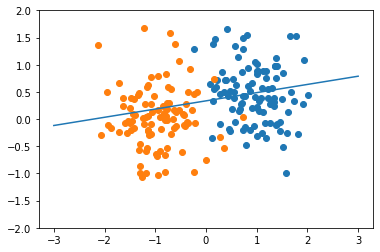

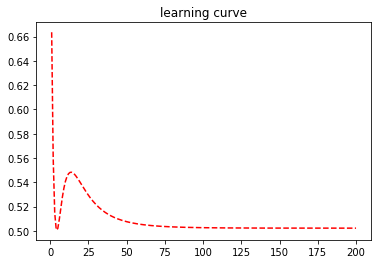

In [4]:

#%%
#detla rule sequential
Data_delta_seq = np.concatenate((A_delta, B_delta), 1)
np.random.shuffle(Data_delta_seq.T)
# # print("Shuffled Data")
# # print(Data)
pattern_delta_seq = Data_delta_seq[0:2,:]
pattern_bias_delta_seq = np.vstack([pattern_delta_seq,bias])
target_delta_seq = Data_delta_seq[2,:]
W_new_delta_seq = np.array([np.random.normal(mu, sigma), np.random.normal(mu, sigma), 1])
epoch_seq=0
error_list = []
learning_rate_delta_batch = 0.001
data_dim=pattern_bias_delta_seq.shape[0]
data_amount=pattern_bias_delta_seq.shape[1]
np.random.shuffle(Data_delta_seq.T)
while epoch_seq <200:
    for i in range (data_amount):
        oneDataPoint = pattern_bias_delta_seq[0:data_dim, i]
        calculated_one_target_delta = W_new_delta_seq.dot(oneDataPoint)
        error_delta_seq = target_delta_seq[i] - calculated_one_target_delta
        delta_W_delta_seq = learning_rate_delta_batch * error_delta_seq * oneDataPoint.T
        W_new_delta_seq += delta_W_delta_seq
    epoch_seq += 1
    mse= mean_squared_error(calculated_one_target_delta, target_delta_seq, Data_delta_seq)
    error_list.append(np.sum(mse))
draw_line(W_new_delta_seq)
draw_learning_curve(error_list)
#%%

## Multiplayer Backprop

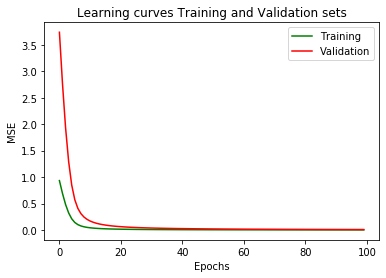

In [7]:
def generalized_delta_rule(input_data, validation_data, bias_row, Nhidden, Noutput, alpha, epochs, fx_approx, learning_rate, training):
    errors = []
    validation_errors = []
    target_bp = input_data[2,:]
    w_backprop = np.random.normal(0,1,[Nhidden,np.shape(input_data)[0]])
    v_backprop = np.random.normal(0,1,[Noutput,Nhidden+1])
    for i in range(epochs):
        #print("epoch : ", i)
        #Forward pass 
        h_in = w_backprop.dot(input_data)
        #print("Input", h_in)
        fi = (2/(1+np.exp(-h_in))) - 1
        h_out = np.vstack([fi, bias_row])
        #print("Hidden output", h_out)
        o_in = v_backprop.dot(h_out)
        o_out = (2/(1+np.exp(-o_in))) - 1
        if epochs > 0:
            squared_error_validation = mean_squared_error(o_out, target_bp, validation_data)
            validation_errors.append(np.sum(squared_error_validation))
        #print("Output rounded ", abs(o_out))
        if training is True:
            #Backward pass
            delta_o = (o_out - target_bp) * ((1 + o_out) * (1 - o_out)) * 0.5
            delta_h = (v_backprop.transpose().dot(delta_o)) * ((1 + h_out) * (1 - h_out)) * 0.5
            delta_h = delta_h[: -1, :]
            #Weight update
            dw = np.zeros(np.shape(w_backprop))
            dv = np.zeros(np.shape(v_backprop))
            dw = (dw * alpha) - ((1 - alpha) * (delta_h.dot(input_data.transpose())))
            dv = (dv * alpha) - ((1 - alpha) * (delta_o.dot(h_out.transpose())))
            w_backprop += (dw * learning_rate)
            v_backprop += (dv * learning_rate)
            #print("Weights : ", w_backprop )
        squared_error = mean_squared_error(o_out, target_bp, input_data)
        errors.append(np.sum(squared_error))
    if fx_approx is False:
            draw_2_line('Learning curves Training and Validation sets', 'Epochs', 'MSE', np.array(np.arange(epochs)), errors, 'g', 'Training', validation_errors, 'r', 'Validation')
            #draw_learning_curve(errors)
            #draw_learning_curve(validation_errors)
    else:    
        return o_out, errors
#%%
def get_validation_Data(input_training_data):
    percent_data = 20
    validation_size = int((percent_data/100)*(len(input_training_data[0])))
    #bias = np.ones(bias_number)
    validation = np.array([np.zeros(validation_size),
              np.zeros(validation_size),
              np.zeros(validation_size)])

    A_n = len(input_training_data[0])
    for x in range(int(validation_size)):
        rand = random.randrange(A_n)
        validation[0,x] = input_training_data[0,rand]
        validation[1,x] = input_training_data[1,rand] 
        validation[2,x] = input_training_data[2,rand] 
        input_training_data = np.delete(input_training_data, rand, 1)
        A_n -= 1
    np.random.shuffle(validation.T)
    return validation, input_training_data
#%%
#two layer backprop with non linear separable data
mu = 0
sigma = 1 # standard deviation
n = 100
mA = [ 1.0, 0.3]; sigmaA = 0.2
mB = [0.0, -0.1]; sigmaB = 0.3
A_bp = np.array([np.concatenate((np.random.normal(mu, sigma, int(n/2)) * sigmaA + mA[0],np.random.normal(mu, sigma, int(n/2)) * sigmaA - mA[0])),
              np.random.normal(mu, sigma, n) * sigmaA + mA[1],
              np.ones(n)])
B_bp = np.array([np.random.normal(mu, sigma, n) * sigmaB + mB[0],
              np.random.normal(mu, sigma, n) * sigmaB + mB[1],
              np.negative(np.ones(n))])
Data_bp = np.concatenate((A_bp, B_bp), 1)
np.random.shuffle(Data_bp.T)
##################################
pattern_bp = Data_bp[0:2,:]
pattern_bias_bp = np.vstack([pattern_bp,bias])
backprop_validation, backprop_training = get_validation_Data(pattern_bias_bp)
backprop_bias = np.ones(len(backprop_training[0]))
backprop_validation_bias = np.ones(len(backprop_validation[0]))

generalized_delta_rule(backprop_training, backprop_validation, backprop_bias, 25, 1, 0.9, 100, False, 0.009, True)
#generalized_delta_rule(backprop_validation, backprop_validation_bias, 4, 1, 0.9, 500, False, 0.001, False)
#%%


## Encoder Problem

In [8]:

initial_data = np.ones((8,8))
for x in range(8):
    initial_data[x,x] = -1
initial_data = initial_data*-1
labels1_encoder = np.ones((4,1))
labels2_encoder = np.ones((4,1))*-1
labels_encoder = np.vstack((labels1_encoder,labels2_encoder))
data_encoder = np.hstack((initial_data,np.ones((8,1)),labels_encoder))
np.random.shuffle(data_encoder)
generalized_delta_rule(data_encoder, np.ones(10), 2, 8, 0.9, 50, False, 0.9, True)


TypeError: generalized_delta_rule() missing 1 required positional argument: 'training'

## Function approximation

In [9]:
#%%

x_fx = np.array(np.arange(-5, 5.5, 0.5))[np.newaxis]
y_fx = np.array(np.arange(-5, 5.5, 0.5))[np.newaxis]
x_fx = x_fx.transpose()
y_fx = y_fx.transpose()
grid_size = len(x_fx)
ndata_fx = len(x_fx) * len(y_fx)
z = (np.exp((-x_fx * x_fx) * 0.1) * np.transpose(np.exp((-y_fx * y_fx) * 0.1))) - 0.5;
target_fx = z.reshape(1, ndata_fx)
xx, yy = np.meshgrid(x_fx, y_fx)
patterns_fx = np.vstack((xx.reshape(1, ndata_fx), yy.reshape(1, ndata_fx)))
data_fx = np.vstack((patterns_fx,target_fx))
bias_fx = np.ones(len(data_fx[0]))
data_fx_bias_complete = np.vstack((data_fx, bias_fx))
fx_out_complete, errors_complete = generalized_delta_rule(data_fx_bias_complete, bias_fx, 26, 1, 0.9, 20, True, 0.08, True)
#print(errors_training)
#draw_learning_curve(errors_training)
zz = fx_out_complete.reshape(grid_size, grid_size)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x_fx, y_fx, zz, rstride=1, cstride=1,
                 cmap='viridis', edgecolor='none')
ax.set_title('Training and Validation surface');

TypeError: generalized_delta_rule() missing 1 required positional argument: 'training'